In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Part 1. Data Exploration

In [52]:
properties_df = pd.read_csv(r"C:\Users\daniela.risco\project-files-real-estate-market-analysis-with-python\properties.csv")
customers_df = pd.read_csv(r"C:\Users\daniela.risco\project-files-real-estate-market-analysis-with-python\customers.csv")

print("Datos de propiedades:")
print(properties_df.info())
print(properties_df.head())

print("\nDatos de clientes:")
print(customers_df.info())
print(customers_df.head())

Datos de propiedades:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB
None
   Unnamed: 0   ﻿id  building  date_sale       type  property#     area  \
0           0  1030         1  11/1/2005  Apartment         30   743.09   
1           1  1029         1  10/1/2005  Apartment         29   756.21   
2           2  2002         2   7/1/2007  Apartment          2   587.28   
3           3

### Part 2. Data Preprocessing

In [53]:
# Manejo de valores nulos
properties_df.fillna(method='ffill', inplace=True)
customers_df.fillna(method='ffill', inplace=True)

C:\Users\daniela.risco\AppData\Local\Temp\ipykernel_10480\3122112933.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  properties_df.fillna(method='ffill', inplace=True)
C:\Users\daniela.risco\AppData\Local\Temp\ipykernel_10480\3122112933.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers_df.fillna(method='ffill', inplace=True)


In [54]:
properties_df['price'] = properties_df['price'].str.strip().replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\daniela.risco\AppData\Local\Temp\ipykernel_10480\1478448514.py:1: SyntaxWarning: invalid escape sequence '\$'
  properties_df['price'] = properties_df['price'].str.strip().replace({'\$': '', ',': ''}, regex=True).astype(float)


### Part 3. Data Visualization

In [60]:
properties_df['date_sale'] = properties_df['date_sale'].astype(str).str.strip()
properties_df['date_sale'] = properties_df['date_sale'].replace(r'^\s*#NUM!\s*$', np.nan, regex=True)
properties_df['date_sale'] = pd.to_datetime(properties_df['date_sale'], errors='coerce')

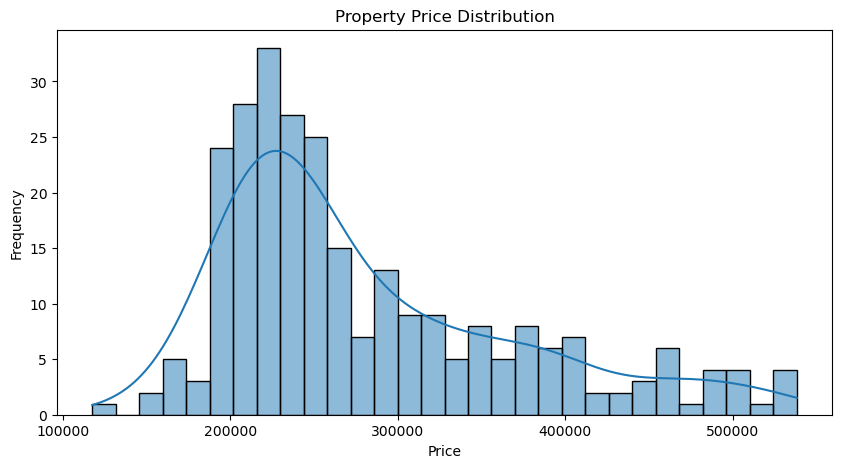

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(properties_df['price'], bins=30, kde=True)
plt.title('Property Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

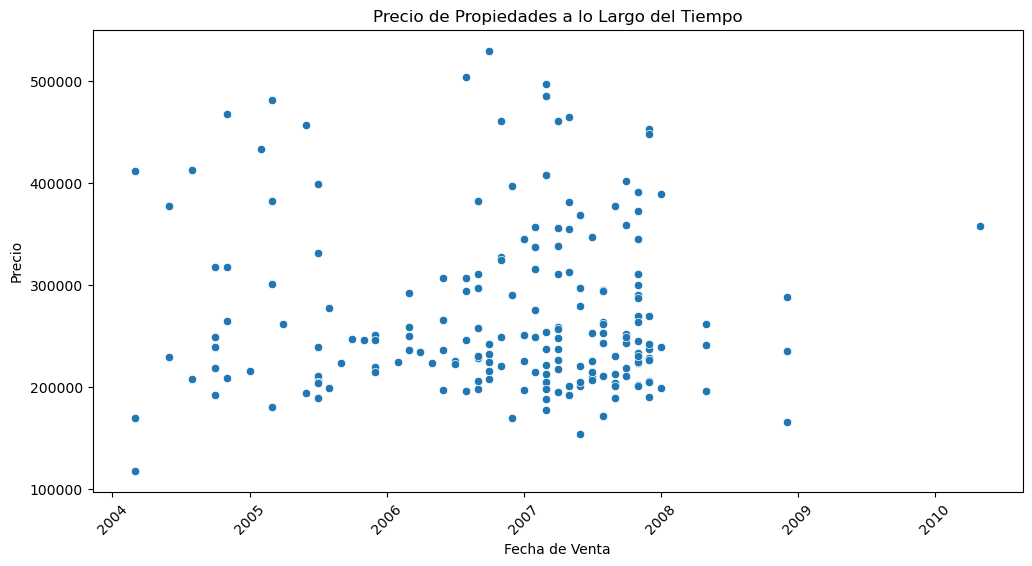

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=properties_df['date_sale'], y=properties_df['price'])
plt.title('Precio de Propiedades a lo Largo del Tiempo')
plt.xlabel('Fecha de Venta')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Guardar resultados procesados
properties_df.to_csv('C:/Users/daniela.risco/project-files-real-estate-market-analysis-with-python/processed_properties.csv', index=False)
customers_df.to_csv('C:/Users/daniela.risco/project-files-real-estate-market-analysis-with-python/processed_customers.csv', index=False)

print("Proceso completado. Datos preprocesados guardados.")